In [2]:
! pip install kaggle


In [15]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [17]:
! kaggle datasets download -d salader/dogs-vs-cats


dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [19]:
import zipfile
zip_ref = zipfile.ZipFile("/content/dogs-vs-cats.zip")
zip_ref.extractall("/content")
zip_ref.close()

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "train",
    image_size=(256,256),
    seed = 100,
    color_mode= 'rgb',
    batch_size=32,
    label_mode = 'int'
)

validation_ds = tf.keras.utils.image_dataset_from_directory(
    "test",
    image_size=(256,256),
    seed = 100,
    color_mode= 'rgb',
    batch_size=32,
    label_mode = 'int',

)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [5]:
for image , label in train_ds:
  print(image.shape)
  print(label.shape)
  break

(32, 256, 256, 3)
(32,)


In [6]:
def normalise(image,label):
  image = tf.cast(image / 255 , tf.float32)
  return image,label

train_ds = train_ds.map(normalise)
validation_ds = validation_ds.map(normalise)

In [24]:
model = Sequential()

model.add(Conv2D(32,input_shape=(256,256,3),padding = "same",activation="relu",kernel_size = (3,3)))
model.add(MaxPooling2D(pool_size=(2,2),padding = "valid",strides = 2))
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(64,padding = "same",activation="relu",kernel_size = (3,3)))
model.add(MaxPooling2D(pool_size=(2,2),padding = "valid",strides = 2))
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(128,padding = "same",activation="relu",kernel_size = (3,3)))
model.add(MaxPooling2D(pool_size=(2,2),padding = "valid",strides = 2))

model.add(Flatten())

model.add(Dense(128,activation = "relu"))
model.add(Dense(64,activation = "relu"))
model.add(Dense(32,activation = "relu"))

model.add(Dense(1 ,activation = "sigmoid"))

In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_10 (Conv2D)          (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                      

In [26]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics = ['accuracy'])

In [27]:
history = model.fit(train_ds,epochs = 10,validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 62s 93ms/step - loss: 0.7392 - accuracy: 0.6389 - val_loss: 0.5382 - val_accuracy: 0.7358
Epoch 2/10
625/625 [==============================] - 58s 92ms/step - loss: 0.5093 - accuracy: 0.7499 - val_loss: 1.2871 - val_accuracy: 0.5896
Epoch 3/10
625/625 [==============================] - 57s 90ms/step - loss: 0.4146 - accuracy: 0.8098 - val_loss: 0.4801 - val_accuracy: 0.7906
Epoch 4/10
625/625 [==============================] - 57s 89ms/step - loss: 0.3139 - accuracy: 0.8659 - val_loss: 0.8247 - val_accuracy: 0.6810
Epoch 5/10
625/625 [==============================] - 63s 100ms/step - loss: 0.2003 - accuracy: 0.9164 - val_loss: 0.6847 - val_accuracy: 0.7634
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.1392 - accuracy: 0.9462 - val_loss: 0.7544 - val_accuracy: 0.7596
Epoch 7/10
625/625 [==============================] - 56s 89ms/step - loss: 0.0908 - accuracy: 0.9666 - val_loss: 0.7582 - val_accurac

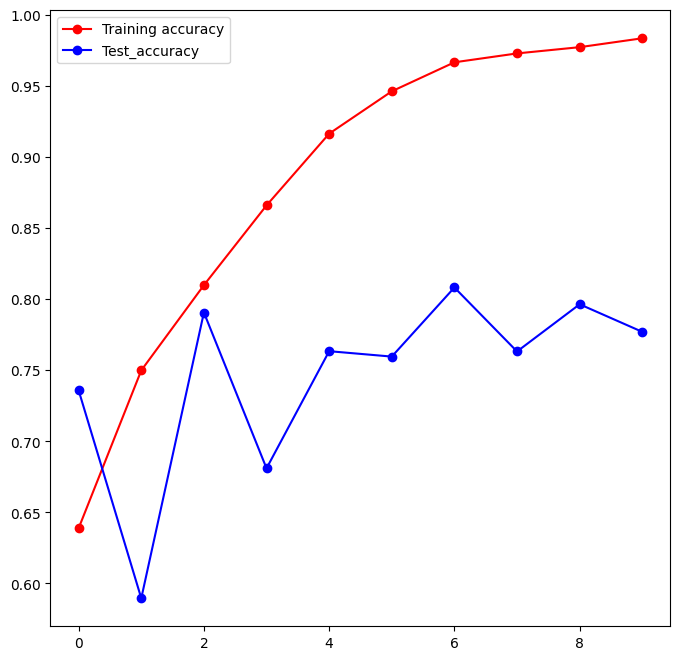

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,8))
plt.plot(history.history['accuracy'] , label = "Training accuracy" ,color='red', marker='o' )
plt.plot(history.history['val_accuracy'] , label = "Test_accuracy" , color = 'blue' , marker = 'o')
plt.legend()
plt.show()

In [29]:
model.evaluate(validation_ds)

157/157 [==============================] - 10s 60ms/step - loss: 0.8026 - accuracy: 0.7770


[0.8026441931724548, 0.7770000100135803]

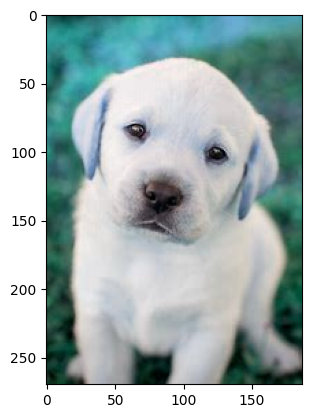

In [55]:
import cv2
dog = cv2.imread("dog.jpg")
plt.imshow(dog)


In [60]:
dog = cv2.resize(dog,(256,256))

In [61]:
dog_input = tf.reshape(dog,shape = (1,256,256,3))
ans = model.predict(dog_input)
if ans == 1 :
  print("Its a dog ")
else :
  print("Its a cat")


1/1 [==============================] - 0s 163ms/step
Its a dog 


In [30]:
model.save("Dog Cat classification")